In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [24]:
df = pd.read_csv('/content/JPM_fraud_detection.csv')

#Data overview

In [25]:
df.head()

,date,open,high,low,close,adj_close,volume
0,1980-03-17 00:00:00-05:00,0.0,5.129630,5.018519,5.037037,1.059499,62775
1,1980-03-18 00:00:00-05:00,0.0,5.111111,5.037037,5.074074,1.067288,64125
2,1980-03-19 00:00:00-05:00,0.0,5.166667,5.111111,5.148148,1.082870,40500
3,1980-03-20 00:00:00-05:00,0.0,5.148148,5.092593,5.111111,1.075079,18900
4,1980-03-21 00:00:00-05:00,0.0,5.222222,5.111111,5.222222,1.098450,97200


In [26]:
df.tail()

,date,open,high,low,close,adj_close,volume
11328,2025-02-25 00:00:00-05:00,262.230011,263.000000,253.350006,257.399994,257.399994,9608400
11329,2025-02-26 00:00:00-05:00,257.160004,260.910004,256.929993,258.790008,258.790008,5943600
11330,2025-02-27 00:00:00-05:00,260.179993,263.640015,257.859985,259.049988,259.049988,8204400
11331,2025-02-28 00:00:00-05:00,260.730011,264.809998,257.890015,264.649994,264.649994,10467100
11332,2025-03-03 00:00:00-05:00,264.000000,266.320007,257.820007,260.619995,260.619995,9050900


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11333 entries, 0 to 11332
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       11333 non-null  object 
 1   open       11333 non-null  float64
 2   high       11333 non-null  float64
 3   low        11333 non-null  float64
 4   close      11333 non-null  float64
 5   adj_close  11333 non-null  float64
 6   volume     11333 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 619.9+ KB


In [28]:
df.describe()

,open,high,low,close,adj_close,volume
count,11333.000000,11333.000000,11333.000000,11333.000000,11333.000000,1.133300e+04
mean,47.650690,48.864861,47.802095,48.341867,35.903285,1.191871e+07
std,47.609704,47.386495,46.576374,46.989746,46.717100,1.630544e+07
min,0.000000,3.625000,3.208333,3.375000,1.055603,1.147500e+04
25%,12.791667,12.916667,12.666667,12.791667,3.960814,1.535400e+06
50%,37.187500,37.666668,36.750000,37.200001,21.451645,7.858000e+06
75%,56.279999,56.770000,55.599998,56.189999,40.660828,1.437610e+07
max,278.679993,280.250000,277.220001,279.950012,279.950012,2.172942e+08


In [29]:
df.isnull().sum() # checks for missing values

,0
date,0
open,0
high,0
low,0
close,0
adj_close,0
volume,0


In [30]:
duplicate_rows = df.duplicated().sum()
print(duplicate_rows) # checks for duplicate values

0


**Observations**

The Dataset contains 11333 rows and 7 columns

Date should be converted to Datetime from object(str)

We can analyse trends, potential anomalies and volatility by observing sudden price jumps or drops

There more zeros in open column which are likely to be errors or missing values.





In [31]:
# change the date to datetime data types for time series analysis
df ['date'] = pd.to_datetime(df['date'], utc=True)

In [32]:
open_unique = df['open'].unique()
print(open_unique)

[  0.           9.77777767   9.76388931 ... 260.1799927  260.730011
 264.        ]


In [33]:
# checking if zeros are as a result of trade halt or data issue
df[df['open'] == 0][['open', 'close', 'high', 'low', 'volume']]


,open,close,high,low,volume
0,0.0,5.037037,5.129630,5.018519,62775
1,0.0,5.074074,5.111111,5.037037,64125
2,0.0,5.148148,5.166667,5.111111,40500
3,0.0,5.111111,5.148148,5.092593,18900
4,0.0,5.222222,5.222222,5.111111,97200
...,...,...,...,...,...
954,0.0,9.666667,9.888889,9.666667,202950
955,0.0,9.694444,9.777778,9.388889,222300
956,0.0,9.777778,10.027778,9.666667,135000
957,0.0,9.833333,9.916667,9.777778,193950


In [34]:
# Convert zeros to NaN (missing values)
df['open'] = df['open'].replace(0, np.nan)
 # Forward fill
df['open'] = df['open'].ffill()
# Backward fill
df['open'] = df['open'].bfill()

Based on  the above results all other columns have meaningful results.

**What Does This Indicate?**

Not a Trading Halt – If trading had been suspended, volume would also be zero. Since volume is positive, trading was active.

Likely a Data Issue – The "open" price is either missing or incorrectly recorded as zero for these rows.

Could Affect Fraud Detection – Price change calculations may be incorrect since open prices are zero.

Anomalies in price jumps may be exaggerated, leading to false fraud flags

we will use impute open column using nearby values

In [35]:
df.head()

,date,open,high,low,close,adj_close,volume
0,1980-03-17 05:00:00+00:00,9.777778,5.129630,5.018519,5.037037,1.059499,62775
1,1980-03-18 05:00:00+00:00,9.777778,5.111111,5.037037,5.074074,1.067288,64125
2,1980-03-19 05:00:00+00:00,9.777778,5.166667,5.111111,5.148148,1.082870,40500
3,1980-03-20 05:00:00+00:00,9.777778,5.148148,5.092593,5.111111,1.075079,18900
4,1980-03-21 05:00:00+00:00,9.777778,5.222222,5.111111,5.222222,1.098450,97200


#Outliers

In [36]:
df['Zscore'] = np.abs(stats.zscore(df['adj_close']))
outliers = df[df['Zscore']>3]
print(outliers)

                           date        open        high         low  \
11075 2024-02-21 05:00:00+00:00  179.949997  180.990005  178.520004   
11076 2024-02-22 05:00:00+00:00  181.820007  183.419998  181.240005   
11077 2024-02-23 05:00:00+00:00  183.809998  185.199997  183.190002   
11078 2024-02-26 05:00:00+00:00  183.750000  184.460007  182.479996   
11079 2024-02-27 05:00:00+00:00  183.309998  183.539993  182.240005   
...                         ...         ...         ...         ...   
11328 2025-02-25 05:00:00+00:00  262.230011  263.000000  253.350006   
11329 2025-02-26 05:00:00+00:00  257.160004  260.910004  256.929993   
11330 2025-02-27 05:00:00+00:00  260.179993  263.640015  257.859985   
11331 2025-02-28 05:00:00+00:00  260.730011  264.809998  257.890015   
11332 2025-03-03 05:00:00+00:00  264.000000  266.320007  257.820007   

            close   adj_close    volume    Zscore  
11075  180.899994  176.857040   7027900  3.017310  
11076  183.070007  178.978546   9296500  3.

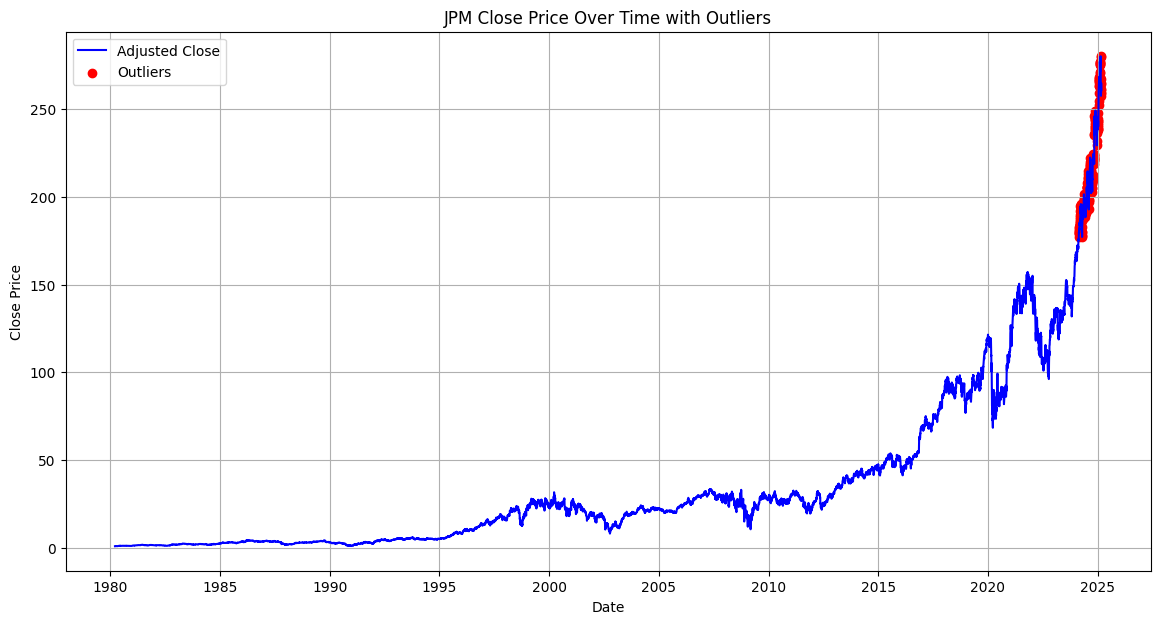

In [38]:
def outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower_bound, upper_bound)

if 'price_change' in df.columns and 'volume' in df.columns:
    df['price_change'] = outliers(df['price_change'])
    df['volume'] = outliers(df['volume'])

#Defined DataFrame
df['Zscore'] = np.abs(stats.zscore(df['adj_close']))
outliers = df[df['Zscore'] > 3]

# Plotting the data
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['adj_close'], label='Adjusted Close', color='blue')
plt.scatter(outliers['date'], outliers['adj_close'], color='red', label='Outliers')
plt.title('JPM Close Price Over Time with Outliers')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()


#Key insights

The analysis of JM's adjusted close price over time shows a remarkable upward trend, particularly from 2010 to 2025. However, the presence of significant outliers raises concerns about potential market manipulation or fraudulent activity. These outliers indicate extreme price fluctuations that merit deeper investigation. While the overall growth is substantial, the unusual movements could signal underlying risks. As data scientists, we should critically evaluate the factors contributing to these anomalies in our analysis.

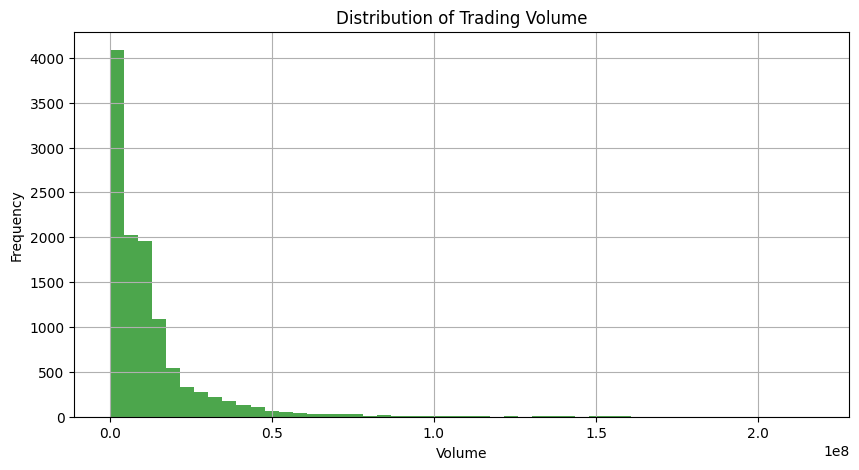

In [39]:
plt.figure(figsize=(10, 5))  # Set the figure size
plt.hist(df['volume'], bins=50, color='green', alpha=0.7)  # Create histogram for 'volume'
plt.title('Distribution of Trading Volume')  # Title
plt.xlabel('Volume')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.grid()  # Add grid
plt.show()  # Show the plot

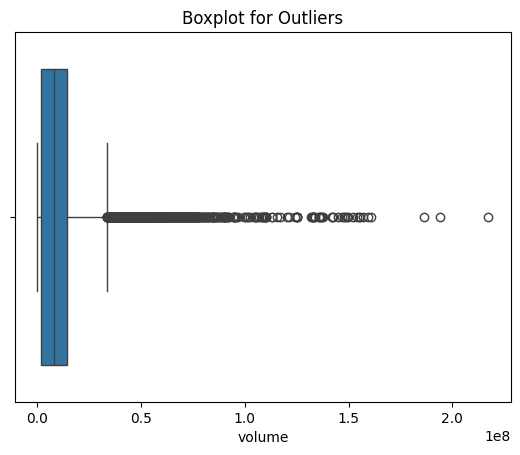

In [40]:
#outliers visualization using boxplot
sns.boxplot(x=df['volume'])
plt.title('Boxplot for Outliers')
plt.show()

Identifying Anomalies to Detect Potential Fraud Cases




In [49]:
 # Percentage change in closing price
df['price_change'] = df['close'].pct_change() * 100

# Define thresholds for anomalies (e.g., top 1% of volume and price change)

# Identifying extreme high trading volumes
volume_threshold = df['volume'].quantile(0.99)

# Identifying extreme price changes
price_change_threshold = df['price_change'].quantile(0.99)
potencial_cases = df[(df['volume'] > volume_threshold) | (df['price_change'].abs() > price_change_threshold)]

print("\nPotential Fraud Cases:\n", potencial_cases)  # Displays suspected fraudulent transactions

styled_fraud_cases = potencial_cases.style.set_properties(**{'background-color': '#f7f7f9', 'color': '#333'})
styled_fraud_cases.set_table_attributes('style="width:100%; border-collapse: collapse;"') \
    .set_table_styles([{'selector': 'th', 'props': [('background-color', '#4CAF50'), ('color', 'white')]}])
styled_fraud_cases




Potential Fraud Cases:
                            date        open        high         low  \
630   1982-09-14 04:00:00+00:00    9.777778    7.250000    6.777778   
750   1983-03-04 05:00:00+00:00    9.777778   10.972222   10.388889   
1104  1984-07-27 04:00:00+00:00    8.583333    9.125000    8.541667   
1504  1986-02-27 05:00:00+00:00   15.083333   15.833333   15.041667   
1871  1987-08-11 04:00:00+00:00   13.875000   14.666667   13.875000   
...                         ...         ...         ...         ...   
10146 2020-06-11 04:00:00+00:00  100.029999  101.580002   96.540001   
10251 2020-11-09 05:00:00+00:00  113.160004  118.900002  110.349998   
10861 2023-04-14 04:00:00+00:00  135.149994  139.119995  134.899994   
11111 2024-04-12 04:00:00+00:00  188.320007  188.929993  182.539993   
11255 2024-11-06 05:00:00+00:00  235.000000  248.000000  234.770004   

            close   adj_close    volume    Zscore  price_change  moving_avg  \
630      7.138889    1.501606    260550  0.

,date,open,high,low,close,adj_close,volume,Zscore,price_change,moving_avg,volatility
630,1982-09-14 04:00:00+00:00,9.777778,7.250000,6.777778,7.138889,1.501606,260550,0.736416,6.639008,6.759259,0.318419
750,1983-03-04 05:00:00+00:00,9.777778,10.972222,10.388889,10.944444,2.302072,479250,0.719280,6.486480,9.799074,0.380568
1104,1984-07-27 04:00:00+00:00,8.583333,9.125000,8.541667,9.125000,2.001020,325800,0.725725,6.829264,8.537500,0.288540
1504,1986-02-27 05:00:00+00:00,15.083333,15.833333,15.041667,15.833333,3.838500,1902600,0.686391,6.741573,14.666667,0.499521
1871,1987-08-11 04:00:00+00:00,13.875000,14.666667,13.875000,14.666667,3.865662,3210000,0.685810,7.317073,13.706944,0.405081
1919,1987-10-19 04:00:00+00:00,11.875000,11.875000,8.583333,8.583333,2.302305,1687200,0.719275,-27.719301,12.450000,0.788932
1921,1987-10-21 04:00:00+00:00,9.375000,9.958333,9.333333,9.333333,2.503477,701400,0.714969,10.891081,12.180555,1.194623
1924,1987-10-26 05:00:00+00:00,8.833333,8.916667,8.333333,8.416667,2.257602,866100,0.720232,-8.181818,11.783333,1.506666
1959,1987-12-15 05:00:00+00:00,7.708333,7.750000,6.750000,6.916667,1.908781,5734200,0.727699,-13.541663,8.829167,0.703061
1962,1987-12-18 05:00:00+00:00,7.375000,7.666667,7.041667,7.666667,2.115757,1286400,0.723269,7.602344,8.625000,0.801400


# Correlation Matrix


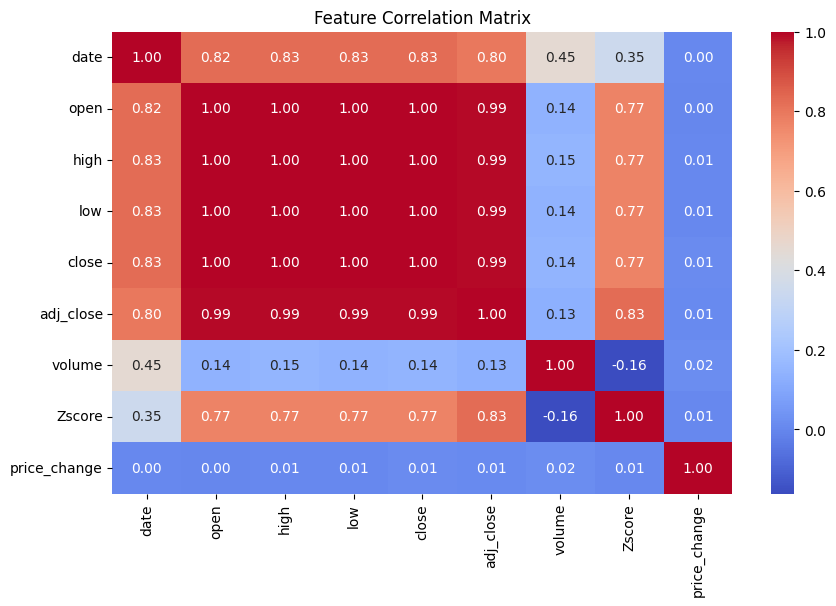

In [42]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


**Key insights**

The correlation matrix gives us some valuable insights that relate directly to stock trading and fraud detection.

1.	Price Relationships: The strong links between the close, high, and low prices mean that they often move together. For traders, this is useful; if prices start to diverge unexpectedly, it could be a sign of unusual activity, possibly even manipulation.
2.	Volume Insights: It’s interesting to see that trading volume doesn’t strongly correlate with price changes. This is important for fraud detection—if there's a sudden spike in volume without a corresponding price jump, it might indicate suspicious behavior, like a pump-and-dump scheme.

3.	Price Changes: The moderate correlation of price change with other price metrics suggests that looking at recent trends can help predict future movements. This means traders can make more informed decisions, while analysts can keep an eye out for any unusual spikes that might signal fraud.
4.	Temporal Trends: The connection between date and price metrics highlights how important timing is in trading. If we notice strange activity at certain times, like the end of a quarter, it could point to fraudulent practices.
5.	Z-score Variability: The Z-score's moderate correlation with price data shows it can be a helpful tool for spotting outliers. In the context of fraud detection, outliers could be red flags that need a closer look.
Overall, these insights not only help traders refine their strategies but also assist in identifying potential fraud, making the trading environment safer and more reliable. Understanding these relationships is key for anyone involved in stock trading or analysis.


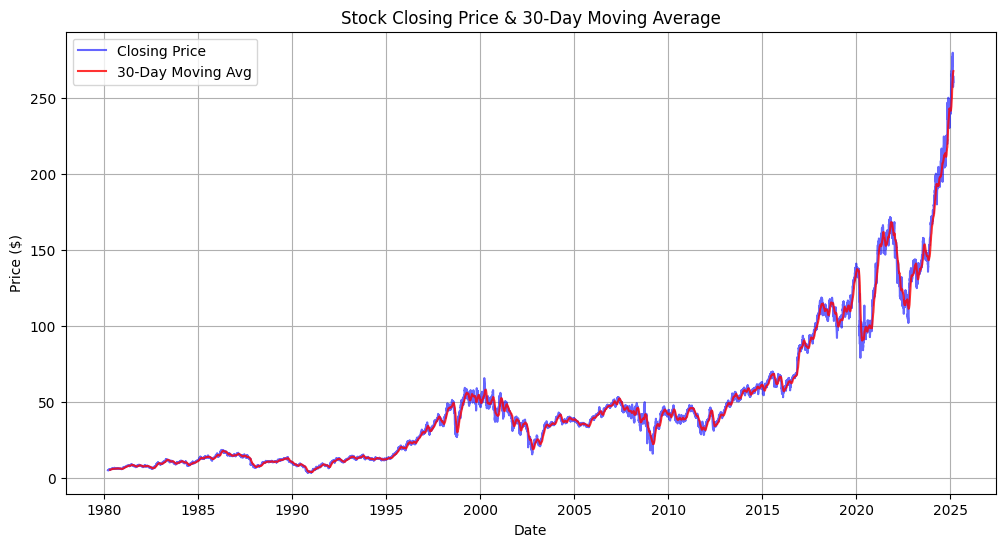

In [43]:
# Moving Average to Identify Trends

df['moving_avg'] = df['close'].rolling(window=30).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Closing Price', color='blue', alpha=0.6)
plt.plot(df['date'], df['moving_avg'], label='30-Day Moving Avg', color='red', alpha=0.8)
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title("Stock Closing Price & 30-Day Moving Average")
plt.legend()
plt.grid()
plt.show()

**key take aways**

The graph illustrates the stock's closing price and its 30-day moving average from 1980 to 2025. Here are the main takeaways:

Overall Growth: The stock price has seen a steady rise, especially since the mid-2000s, reflecting strong business growth and investor confidence.

Price Fluctuations: There are noticeable ups and downs in the stock price. These fluctuations can be a normal part of the market, but sudden spikes or drops might raise questions about potential fraud or manipulation.

Moving Average: The 30-day moving average helps smooth out the day-to-day price changes, making it easier to see the long-term growth trend and spot any unusual activity that could suggest something fishy is going on.

Crossovers: When the stock price crosses above or below the moving average, it can signal when to buy or sell. However, if these changes happen without a clear reason, it could be a red flag for investors.

Recent Surge: Recently, both the stock price and the moving average have sharply increased. While this points to strong business performance, if the rise seems sudden or unjustified, it might warrant a closer look for possible fraud.

Context Matters: Economic events can significantly impact stock prices. Understanding these events helps distinguish between genuine business growth and any suspicious behavior.


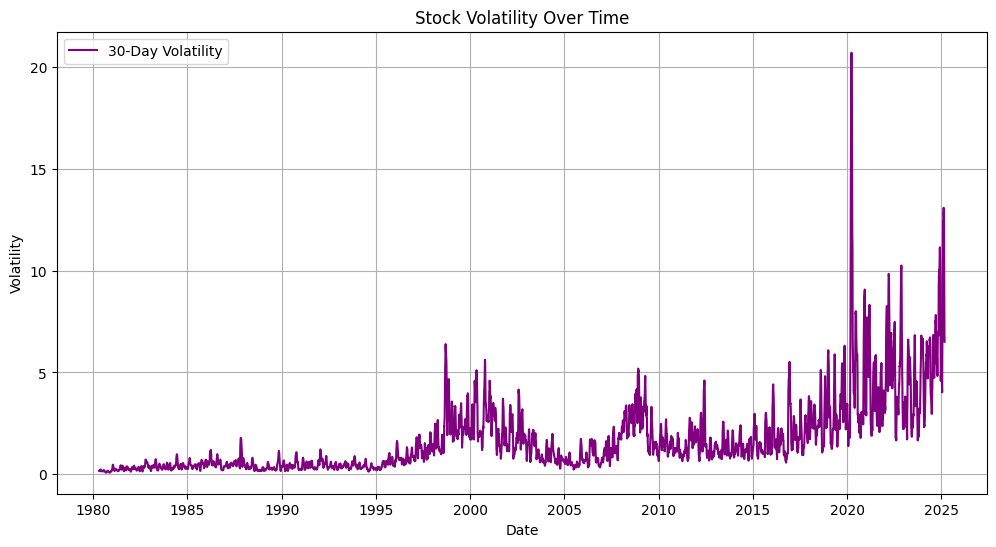

In [44]:
# Volatility Analysis

df['volatility'] = df['close'].rolling(window=30).std()
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['volatility'], color='purple', label='30-Day Volatility')
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Stock Volatility Over Time")
plt.legend()
plt.grid()
plt.show()

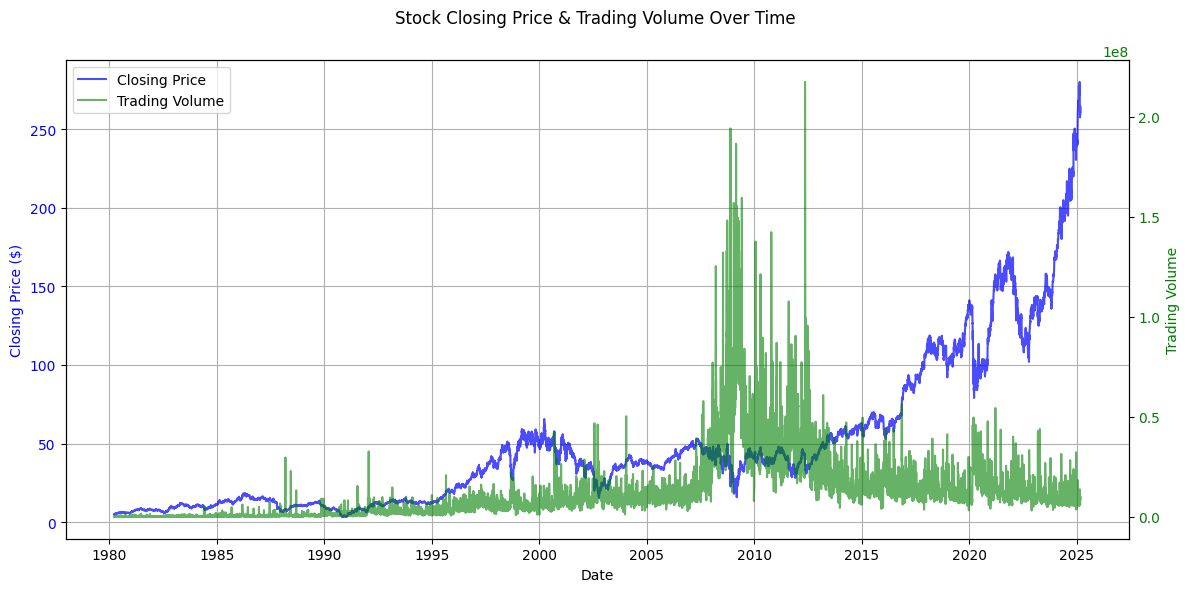

In [45]:
# Plot Closing Price and Trading Volume Trends
fig, ax1 = plt.subplots(figsize=(12, 6))

# Closing price trend
ax1.set_xlabel("Date")
ax1.set_ylabel("Closing Price ($)", color='blue')
ax1.plot(df['date'], df['close'], label="Closing Price", color='blue', alpha=0.7)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create a second y-axis for volume
twin_ax = ax1.twinx()
twin_ax.set_ylabel("Trading Volume", color='green')
twin_ax.plot(df['date'], df['volume'], label="Trading Volume", color='green', alpha=0.6)
twin_ax.tick_params(axis='y', labelcolor='green')

# Title and legend
fig.suptitle("Stock Closing Price & Trading Volume Over Time")
fig.tight_layout()

# Get all handles and labels from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = twin_ax.get_legend_handles_labels()

# Combine handles and labels
handles = handles1 + handles2
labels = labels1 + labels2

# Create the legend (key)
plt.legend(handles, labels, loc="upper left")  # Adjust 'loc' as needed

plt.show()

**Key Take aways**

The graph shows stock closing prices and trading volume from 1980 to 2025. Here’s a simple breakdown:

Rising Prices: The stock prices have generally gone up a lot, especially since the mid-2000s. This suggests that companies are growing and investors are feeling confident.

Trading Volume Changes: The amount of trading (how many shares are bought and sold) varies a lot. There are big jumps in trading volume at certain times, which often happens when there’s important news or events.

Price and Volume Connection: When stock prices go up, trading volume usually increases too. But if trading volume spikes without a price increase, it could be a sign of something suspicious, like trade fraud.

Big Events: We see significant spikes in trading volume around major events, like the 2008 financial crisis and during the early 2020s. These spikes can indicate panic or excitement, but they can also be linked to fraud, where some traders might try to manipulate the market.

Recent Highs: Recently, both stock prices and trading volume have reached new highs. While this seems positive, it can also raise concerns about possible market manipulation, where some people might try to artificially inflate prices.

What It Means for Investors: For anyone investing in stocks, it’s essential to pay attention to both price changes and trading volume. High trading volume can show interest, but it can also hide potential fraud. Being aware of these patterns can help investors make better decisions.

# Visualization of Anomalies

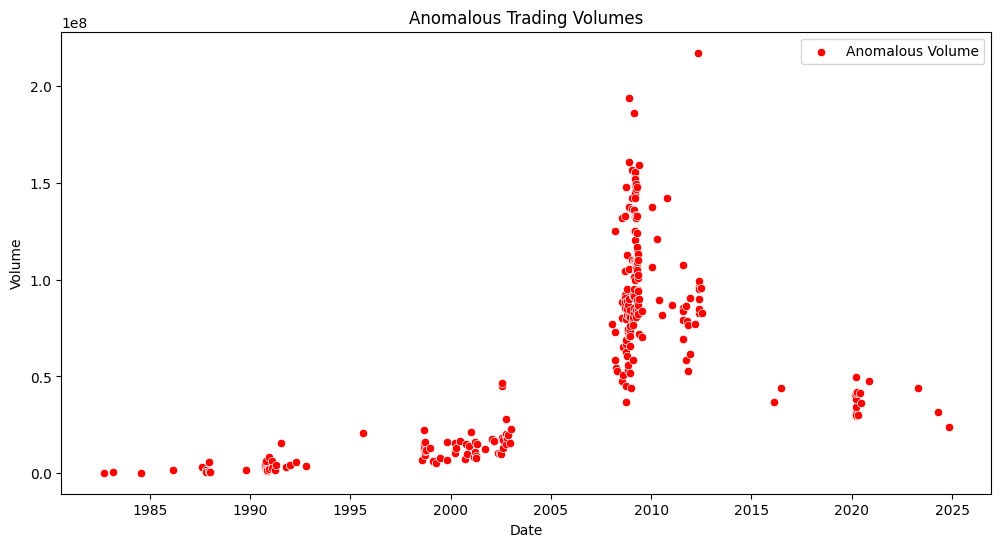

In [46]:
# Scatter plot for identifying anomalous trading volumes
plt.figure(figsize=(12, 6))
sns.scatterplot(data=potencial_cases, x='date', y='volume', color='red', label='Anomalous Volume')
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Anomalous Trading Volumes")
plt.legend()
plt.show()



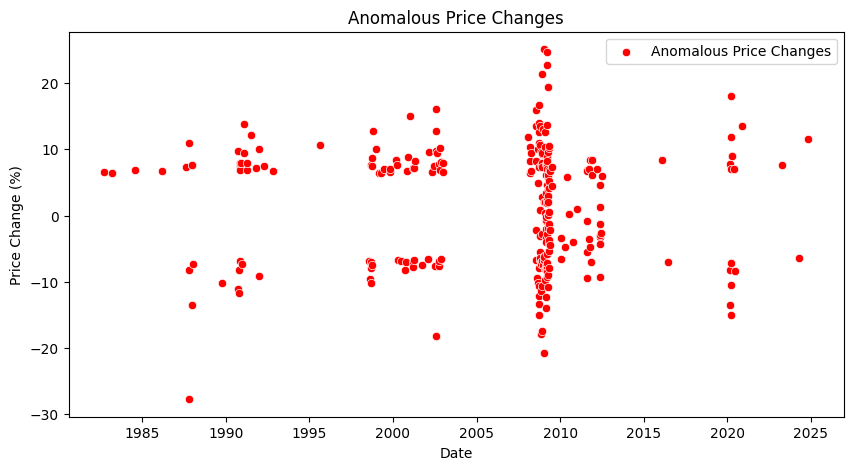

In [48]:
# Scatter plot for identifying anomalous price changes
plt.figure(figsize=(10, 5))
sns.scatterplot(data=potencial_cases, x='date', y='price_change', color='red', label='Anomalous Price Changes')
plt.xlabel("Date")
plt.ylabel("Price Change (%)")
plt.title("Anomalous Price Changes")
plt.legend()
plt.show()
